*This post explores how to create blog posts from Jupyter notebooks which include interactive plots made with Plotly or Bokeh.*

---

This blog is hosted on [GitHub Pages](https://pages.github.com/) and uses the [Jekyll](https://jekyllrb.com/) static site generator to create the site's HTML from the content I create. If I'm writing simple blog posts then authoring a markdown file is fine, but more often I'd like to create posts with code examples and outputs including plots of data, and so would like to author the post as a [Jupyter notebook](https://jupyter.org/). I'd particularly like to be able to include interactive plots using [Plotly](https://plotly.com/python/) and/or [Bokeh](https://bokeh.org/). 

I've previously figured out how to do this with Bokeh plots by using nbconvert to convert a notebook to a markdown file. However, this involved a bit of manual post-processing faff. So I thought I'd revisit this and see if I can find a simpler approach which works for recent versions of Bokeh and Plotly. It seems there's several different ways you can do this, but here is one possible approach.

## Prerequisites

I have the GitHub repo containing my blog content cloned to my local filesystem. I also have things set up so I can [generate and preview the site locally](https://docs.github.com/en/pages/setting-up-a-github-pages-site-with-jekyll/testing-your-github-pages-site-locally-with-jekyll) by doing:

```
$ bundle exec jekyll serve
```

I also have `jupyterlab`, `nbconvert`, `plotly` and `bokeh` installed into a conda environment on my local system. I'll explore later exactly how I'm doing this to ensure I have a locked environment associated with each blog post.

## Creating the source notebook for a new blog post

To author a new post I've run Jupyter Lab and created a notebook. Ultimately the content for the post will need to end up in the `_posts` folder, but I've put the source notebook in a separate folder. E.g., this notebook is at `src/2024-08-20-jupyter-blogging/post.ipynb`.

## Front matter

Every blog post needs to have "front matter" which provides the title and tells Jekyll to display the content as a blog post. To add this front matter, I've put the following into the very first cell of this notebook, which I've selected to be a "Raw" cell type:

```
---
layout: post
title: Blogging with Jekyll, Jupyter notebooks and interactive plots (Plotly, Bokeh)
---

```

I also add an empty line after the front matter, which ensures the front matter won't get mangled together with whatever cell comes after.

## Disabling liquid tags

A problem that can occur when blog posts contain code or interactive plots is that Jekyll mistakenly tries to process a piece of code as a [liquid tag](https://jekyllrb.com/docs/liquid/), which is a system that Jekyll uses to inject variables into posts. I don't need to use liquid tags at all, so I'll disable them for the entire post. This can be done by adding a "Raw" type cell at the beginning of the notebook containing:

```
{{ "{% raw " }}%}
```

Then add another "Raw" type cell right at the end of the notebook containing:

```
{{ "{% endraw " }}%}
```

## Plotly interactive plots

Check what version of Plotly is installed.

In [1]:
import plotly
plotly.__version__

'5.24.0'

I've found that Plotly depends on RequireJS, and although this will automatically be loaded when using Jupyter Lab, this won't be automatically included in the HTML generated by nbconvert. So this cell manually ensures RequireJS is present.

In [2]:
%%html
<script
src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.7/require.min.js"
integrity="sha512-J5ha2LF4Le+PBQnI5+xAVJDR+sZG9uSgroy4n/A6TLjNkvYQbqZA8WHZdaOvJ0HiKkBC9Frmvs10rFDSHKmveQ=="
crossorigin="anonymous"
referrerpolicy="no-referrer"></script>

If I don't want to see this cell in the blog post, I could add a [cell tag](https://nbconvert.readthedocs.io/en/latest/removing_cells.html) to remove the input.

I'd like to create Plotly plots and have them display interactively, both within the Jupyter notebook as I'm authoring it, and in the final blog post displayed on the Jekyll site. To get this to work, I found I needed to add the following cell to the notebook before creating the plot.

In [3]:
import plotly.io as pio
pio.renderers.default = "notebook_connected+plotly_mimetype"

Apparently this tells Plotly to render any plots in a way that is suitable for [multiple environments](https://plotly.com/python/renderers/#multiple-renderers). The `plotly_mimetype` renderer is suitable for viewing the source notebook within Jupyter Lab. The `notebook_connected` renderer is necessary for the plot to appear in the Jekyll site.

Now try to create a plot.

In [4]:
import plotly.express as px

In [5]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


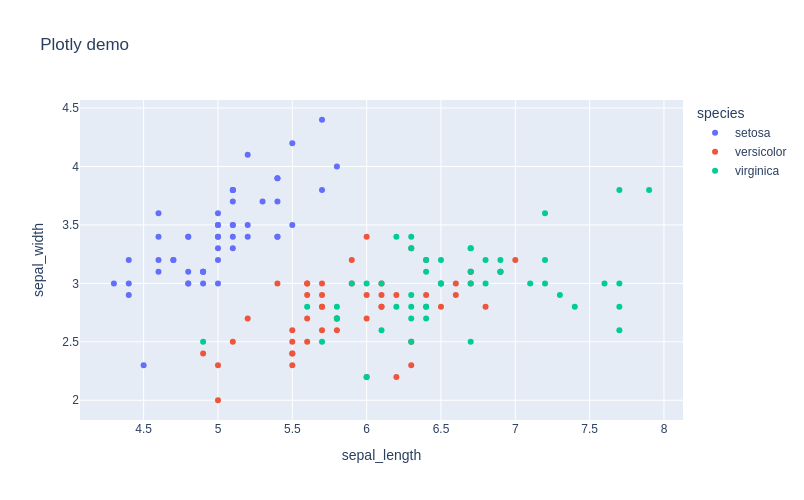

In [6]:
px.scatter(
    data_frame=df, 
    x="sepal_length", 
    y="sepal_width", 
    color="species",
    width=600,
    height=500,
    title="Plotly demo",
)

A scatter plot should be visible in the cell output above, both in the source notebook and the blog post. It should also be interactive, e.g., pan, zoom and hover tooltips should work.

## Bokeh interactive plots

Check what version of Bokeh is installed.

In [7]:
import bokeh
import bokeh.plotting
import bokeh.palettes
import bokeh.transform
bokeh.__version__

'3.5.2'

I've found that Bokeh depends on jQuery, and although this will automatically be loaded when using Jupyter Lab, this won't be automatically included in the HTML generated by nbconvert. So this cell manually ensures jQuery is present.

In [8]:
%%html
<script
  src="https://code.jquery.com/jquery-3.7.1.slim.min.js"
  integrity="sha256-kmHvs0B+OpCW5GVHUNjv9rOmY0IvSIRcf7zGUDTDQM8="
  crossorigin="anonymous"></script>

If I don't want to see this cell in the blog post, I could add a [cell tag](https://nbconvert.readthedocs.io/en/latest/removing_cells.html) to remove the input.

Now call `output_notebook()` to get plots showing as output within the notebook.

In [9]:
bokeh.plotting.output_notebook()

Loading BokehJS ...

Above should say "BokehJS ... successfully loaded." both in Jupyter Lab and the final post.

Now create a Bokeh plot.

In [10]:
# Define variables to plot.
x_variable = "sepal_length"
y_variable = "sepal_width"
color_variable = "species"

# Set up mapping from values to colors.
color_factors = df[color_variable].unique()
palette = bokeh.palettes.d3['Category10'][len(color_factors)]
color_map = bokeh.transform.factor_cmap(
    field_name=color_variable,
    palette=palette,
    factors=color_factors,
)

# Create a figure.
fig = bokeh.plotting.figure(
    width=500, 
    height=400,
    tools="pan,box_zoom,wheel_zoom,save,reset,hover,help",
    tooltips=[
        ("species", "@species"),
        (x_variable, f"@{x_variable}"),
        (y_variable, f"@{y_variable}"),
    ]
)

# Add a scatter trace.
fig.scatter(
    source=df, 
    x=x_variable, 
    y=y_variable, 
    color=color_map,
    legend_field=color_variable,
    size=10,
    alpha=0.7,
)

# Tidy up.
fig.title = "Bokeh demo"
fig.xaxis.axis_label = x_variable
fig.yaxis.axis_label = y_variable

bokeh.plotting.show(fig)

A scatter plot should be visible above, and should be interactive, e.g., pan, zoom and hover tooltips should work.

## Converting the notebook to HTML

Once finished editing the notebook, I now need to convert it to something that Jekyll can use. [nbconvert](https://nbconvert.readthedocs.io/en/latest/) can convert a notebook to either markdown or HTML, and previously I have converted to markdown. However, currently I'm finding it slightly easier to convert to HTML. Jekyll is quite happy to be given an HTML file.

This from the command line:

```
$ jupyter nbconvert post.ipynb --to html --template basic --no-prompt
```

...will generate a file `post.html` alongside `post.ipynb`.

## Previewing the new post

Above I mentioned that I put the source notebook at `src/2024-08-20-jupyter-blogging/post.ipynb`. This means the converted HTML is now at `src/2024-08-20-jupyter-blogging/post.html`. Because it's outside the `_posts` folder, it won't yet be visible on the front page of the blog. To get the new post listed on the home page I did:

```
$ cd _posts
$ ln -s ../src/2024-08-20-jupyter-blogging/post.html 2024-08-20-jupyter-blogging.html
```

This creates a symlink within the `_posts` folder. The post is now visible at `http://127.0.0.1:4000/2024/08/20/jupyter-blogging.html`.

## Customising CSS

I added a bit of CSS to style the blog post. Here's some rules I added to `_sass/_base.css`:

```
div.input_area pre {
    padding: 8px 12px;
    background-color: #eef;
    border: 1px solid #e8e8e8;
    border-radius: 3px;
}

div.input, div.output {
    font-size: 12px;
}

hr {
    margin-block-start: 1em;
    margin-block-end: 1em;
}
```

## Managing environments

I mentioned above that I'm creating a separate Python environment for each blog post. The rationale for this is that software changes over time, and if I ever need to go back and edit or update a blog post created from a Jupyter notebook, I'd like a record of which packages and versions I used. When I move on to the next blog post, I am free to use a different set of packages and versions, without disrupting any previous blog posts.

I'm doing this using [pixi](https://pixi.sh/latest/). E.g., when I first created the directory for the source notebook for this post, I also initialised a pixi environment...

```
$ mkdir -pv src/2024-08-20-jupyter-blogging
$ cd src/2024-08-20-jupyter-blogging
$ pixi init .
$ pixi add python=3.11 jupyterlab nbconvert plotly pandas bokeh
```

To launch Jupyter Lab I then did:

```
$ pixi run jupyter lab
```

...and to convert the notebook to HTML:

```
$ pixi run jupyter nbconvert post.ipynb --to html --template basic --no-prompt
```

To get this conversion running automatically on a change to the source notebook:

```
$ while inotifywait -e close_write post.ipynb; do pixi run jupyter nbconvert post.ipynb --to html --template basic --no-prompt; done
```

Here's a bash script I use to run the automatic conversion, adding in options to remove cell input or output or whole cells based on cell tags:

```bash
#!/bin/bash
while inotifywait -e close_write post.ipynb
do
    pixi run jupyter nbconvert post.ipynb \
	 --to html \
	 --template basic \
	 --no-prompt \
	 --TagRemovePreprocessor.enabled=True \
	 --TagRemovePreprocessor.remove_input_tags remove_input \
	 --TagRemovePreprocessor.remove_all_outputs_tags remove_output \
	 --TagRemovePreprocessor.remove_cell_tags remove_cell
done
```

Using pixi this way, everything I need for each post is then self-contained and versions are locked.

## Summary of dev setup

When developing a new blog post...

1. Open a terminal, cd to the root directory of my blog repo, and run Jekyll:

```
$ bundle exec jekyll serve
```

2. Open a second terminal, create a source directory for the new blog post, initialise pixi, add packages, run Jupyter Lab:

```
$ mkdir -pv src/YYYY-MM-DD-new-blog-post
$ cd src/YYYY-MM-DD-new-blog-post
$ pixi init .
$ pixi add python=3.11 jupyterlab nbconvert plotly pandas bokeh
$ pixi run jupyter lab
```

...and create a notebook called "post.ipynb". 

3. Open a third terminal, start a watcher to convert the notebook to HTML on save:

```
$ cd src/YYYY-MM-DD-new-blog-post
$ while inotifywait -e close_write post.ipynb; do pixi run jupyter nbconvert post.ipynb --to html --template basic --no-prompt --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_input_tags remove_input --TagRemovePreprocessor.remove_all_output_tags remove_output --TagRemovePreprocessor.remove_cell_tags remove_cell; done
```

4. Symlink the converted HTML into the `_posts` folder:

```
$ cd _posts
$ ln -s ../src/YYYY-MM-DD-new-blog-post/post.html YYYY-MM-DD-new-blog-post.html
``` 


## Troubleshooting

On one occasion I found the post was not rendering at all, due to the fact that the front matter was not followed by a newline. I had placed another raw cell immediately after the first raw cell with the front matter, and the two raw cells were output in the HTML without any newline between them. Adding in a newline after the front matter solved it.

---

I hope that might be useful. Any suggestions or pointers to alternative approaches welcome in comments below :)
